##### Concurrency and interaction  2024/2025
### Lecture 3 - Deutsch Algorithm

<!-- no toc -->
### Contents 

1. [Deutsch's Algorithm](#Deutsch)
2. [Deutsch-Jozsa Algorithm](#Deutsch-jozsa)

### 2. Deutsch's Algorithm <a id="Deutsch"></a>

Let's consider a Boolean function $f:\{0,1\} \rightarrow \{0,1\}$ that can either be balanced or constant.

- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for one input and 1 for the other


<p align="center">
  <img width="600" height="300" src="images/balanced_vs_constant.png">
</p>

<p align="center">
  <img width="600" height="200" src="images/deutsch.png">
</p>

$U_f$ is our function, usually seen as an oracle, or a black-box function that we want to find if it's balanced or constant


The result for the measurement of the first qubit will be:

* $P(0)=1$ if the function is **constant**
* $P(1)=1$ if the function is **balanced**

In general for $n$-bit Boolean functions $f:\{0,1\}^n \rightarrow \{0,1\}$, the generalized Deutsch-Jozsa algorithm can determine if the function is constant or balanced with $\mathcal{O}(1)$ queries to the function using superposition of inputs + interference. 

The classical algorithm needs $\mathcal{O}(2^{n-1} + 1)$ queries to determine if the function is balanced or constant.

#### Implement every function and check if it's balanced or constant


In [1]:
import pennylane as qml

In [18]:
def function(id=1):

    if id==2:
        qml.PauliX(wires=0)
    elif id==3:
        qml.CNOT(wires=[0, 1])
    elif id==4:
        qml.PauliX(wires=0)
        qml.CNOT(wires=[0, 1])
        qml.PauliX(wires=0)




In [25]:

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def Deutsch(id=1):

    #superposition
    qml.Hadamard(wires=0)

    
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)
    qml.Barrier()

    #function

    function(id=id)
    qml.Barrier()

    #interference

    qml.Hadamard(wires=0)
    qml.Barrier()


    #measurement

    return qml.probs(wires=[0])

    

In [ ]:
#execute the circuit

Deutsch(id=1)

tensor([1., 0.], requires_grad=True)

(<Figure size 1000x300 with 1 Axes>, <Axes: >)

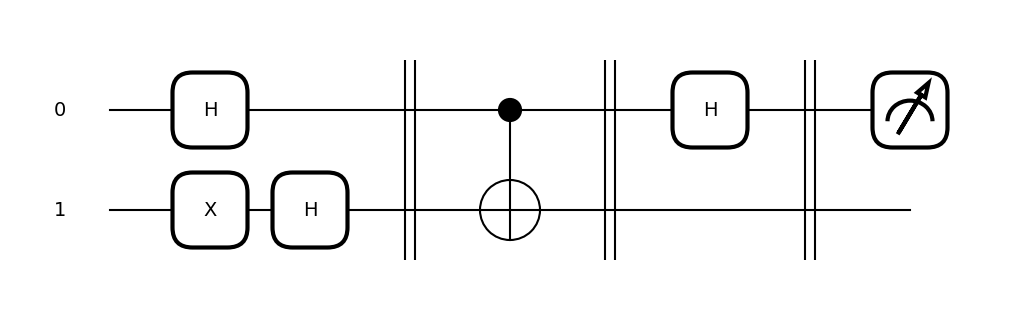

In [26]:
qml.draw_mpl(Deutsch)(id=3)

### 3. Deutsch-Jozsa Algorithm <a id="Deutsch-jozsa"></a>

Deutsch-Josza algorithm is the generalization of the previous algorithm for boolean functions for $n$ bit strings rather than single bit string inputs.

<p align="center">
  <img width="700" height="200" src="images/dj.png">
</p>

The results for the single input case also remain true in this setting with minor differences:

* Hadamard uniform superposition over all qubits instead of a single qubit
* We will measure all input qubits instead of the single qubit
* $P(000 \dots 0)=1$ if the function is **constant**
* $P(000 \dots 0)=0$ if the function is **balanced**




#### Implement Deuscht-Jozsa Algorithm 

In [4]:

dev = qml.device("default.qubit", wires=3)

def function():
    qml.Toffoli(wires=[0, 1, 2])

@qml.qnode(dev)
def Deutsch_Jozsa(nqubits_input, nqubits_ancilla):

    #inputs
    for i in range(nqubits_input):
        qml.Hadamard(wires=i)
    
    #ancilla
    qml.PauliX(wires=nqubits_ancilla)
    qml.Hadamard(wires=nqubits_ancilla)
    
    #or 
    #qml.broadcast(qml.Hadamard , wires=range(nqubits_input), pattern="single")

    #function
    function()

    #interference
    for i in range(nqubits_input):
        qml.Hadamard(wires=i)

    #measurement
    return qml.probs(wires=range(nqubits_input))


In [5]:
#execute the circuit

Deutsch_Jozsa(nqubits_input=2, nqubits_ancilla=[2])

tensor([0.25, 0.25, 0.25, 0.25], requires_grad=True)

#### Implement the Deutsch-Josza algorithm for the 3-bit string function with truth table 

|x_0|x_1|y|        
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

Consider the following 3-qubit input state truth table:

| Input | Output |
|-------|--------|
| 000   | 1      |
| 001   | 1      |
| 010   | 1      |
| 011   | 1      |
| 100   | 0      |
| 101   | 0      |
| 110   | 0      |
| 111   | 0      |

implement the algorithm for this function 